In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [91]:
INFILE = '/Users/zachtsouprakos/documents/msds/msds-422/module_1/Insurance.csv'

TARGET_F = 'TARGET_CLM_FLAG'
TARGET_A = 'TARGET_CLM_AMT'

In [92]:
df = pd.read_csv(INFILE)
dt = df.dtypes

In [93]:
objList = []
numList = []

for i in dt.index:
    if i in ([TARGET_F, TARGET_A]) : continue
    if dt[i] in (['object']) : objList.append(i)
    if dt[i] in (['float64','int64']) : numList.append(i)

In [94]:
# Code from last week
"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )


dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )



'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''

df["y_EDU_4"] = (df.EDUCATION.isin( ["a_PhD"] ) + 0 )
df["y_EDU_3"] = (df.EDUCATION.isin( ["a_PhD","b_Masters"] ) + 0)
df["y_EDU_2"] = (df.EDUCATION.isin( ["a_PhD","b_Masters","c_Bachelors"] ) + 0)
df["y_EDU_1"] = (df.EDUCATION.isin( ["a_PhD","b_Masters","c_Bachelors","d_High School"] ) + 0)
df = df.drop( "EDUCATION", axis=1 )
   

dt = df.dtypes
objList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )


for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=True )   
    #y = pd.get_dummies( df[i], prefix=thePrefix )   
    df = pd.concat( [df, y], axis=1 )
    #df = df.drop( i, axis=1 )

In [95]:
for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = 'M_' + i
    IMP = 'IMP_' + i
#     print(df[i].isna().sum())
#     print(FLAG)''
#     print(IMP)
    df[FLAG] = df[i].isna() + 0 # create fields that indicate whether the value was missing
    df[IMP] = df[ i ]
    df.loc[df[IMP].isna(), IMP] = df[i].median() # replace null values with median for of the column
    # df = df.drop(i, axis=1)
#    print('--------')
    
# someData = df.head().T
# for r in range(someData.shape[0]):
#     print(someData.iloc[r,])
#     print('-----\n\n')

In [96]:
i = "INCOME"
FLAG = "M_" + i
IMP = "IMP_" + i
#print( i )
#print( FLAG )
#print( IMP )
df[ FLAG ] = df[i].isna() + 0
df[ IMP ] = df[ i ]
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Blue Collar"]), IMP ] = 53694
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Student"]), IMP ] = 360
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Clerical"]), IMP ] = 30799
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Doctor"]), IMP ] = 121398
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Home Maker"]), IMP ] = 776
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Lawyer"]), IMP ] = 83230
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["MISSING"]), IMP ] = 109953
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Manager"]), IMP ] = 78589
df.loc[ df[IMP].isna() & df["IMP_JOB"].isin(["Professional"]), IMP ] = 71230
df.loc[ df[IMP].isna(), IMP ] = df[i].median()
df = df.drop( i, axis=1 )
numList.remove(i)

"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    g = df.groupby( NAME )
    df = df.drop( i, axis=1 )

In [97]:
objList

['PARENT1',
 'MSTATUS',
 'SEX',
 'CAR_USE',
 'CAR_TYPE',
 'RED_CAR',
 'REVOKED',
 'URBANICITY',
 'IMP_JOB']

In [98]:
numList

['KIDSDRIV',
 'AGE',
 'HOMEKIDS',
 'YOJ',
 'HOME_VAL',
 'TRAVTIME',
 'BLUEBOOK',
 'TIF',
 'NPOLICY',
 'OLDCLAIM',
 'CLM_FREQ',
 'MVR_PTS',
 'CAR_AGE']

In [99]:
df.head()

,TARGET_CLM_FLAG,TARGET_CLM_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,HOME_VAL,MSTATUS,SEX,...,M_AGE,IMP_AGE,M_YOJ,IMP_YOJ,M_INCOME,IMP_INCOME,M_HOME_VAL,IMP_HOME_VAL,M_CAR_AGE,IMP_CAR_AGE
0,0,NaN,0,51.0,0,12.0,No,249276.0,Yes,F,...,0,51.0,0,12.0,0,85076.0,0,249276.0,0,8.0
1,1,6872.0,0,37.0,0,10.0,No,245993.0,Yes,M,...,0,37.0,0,10.0,0,55076.0,0,245993.0,0,1.0
2,1,6716.0,3,36.0,4,0.0,No,0.0,Yes,F,...,0,36.0,0,0.0,1,360.0,0,0.0,0,10.0
3,0,NaN,0,52.0,0,12.0,No,274122.0,Yes,M,...,0,52.0,0,12.0,0,68564.0,0,274122.0,0,11.0
4,1,5970.0,0,33.0,4,14.0,Yes,0.0,No,M,...,0,33.0,0,14.0,0,30504.0,0,0.0,1,8.0


In [100]:
for i in objList:
    df = df.drop(i, axis = 1)

In [101]:
df.head()

,TARGET_CLM_FLAG,TARGET_CLM_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,...,M_AGE,IMP_AGE,M_YOJ,IMP_YOJ,M_INCOME,IMP_INCOME,M_HOME_VAL,IMP_HOME_VAL,M_CAR_AGE,IMP_CAR_AGE
0,0,NaN,0,51.0,0,12.0,249276.0,25,25860,4,...,0,51.0,0,12.0,0,85076.0,0,249276.0,0,8.0
1,1,6872.0,0,37.0,0,10.0,245993.0,23,16400,4,...,0,37.0,0,10.0,0,55076.0,0,245993.0,0,1.0
2,1,6716.0,3,36.0,4,0.0,0.0,54,1500,4,...,0,36.0,0,0.0,1,360.0,0,0.0,0,10.0
3,0,NaN,0,52.0,0,12.0,274122.0,44,10950,4,...,0,52.0,0,12.0,0,68564.0,0,274122.0,0,11.0
4,1,5970.0,0,33.0,4,14.0,0.0,33,7850,6,...,0,33.0,0,14.0,0,30504.0,0,0.0,1,8.0


In [102]:
X = df.copy()
X = X.drop(['AGE','YOJ' ,'HOME_VAL' ,'CAR_AGE'], axis = 1)

In [103]:
# -----------------
# Give me a list of all variables in the data frame and just keep the floats and ints
dt = X.dtypes
numList = []
for i in dt.index:
    if i in ([TARGET_A, TARGET_F, 'M_AGE', 'M_YOJ', 'M_INCOME', 'M_HOME_VAL', 'M_CAR_AGE', 'y_EDU_4','y_EDU_3','y_EDU_2','y_EDU_1']) : continue
    if dt[i] in (['float64','int64']) : numList.append(i)

for i in numList:
    print(i)

KIDSDRIV
HOMEKIDS
TRAVTIME
BLUEBOOK
TIF
NPOLICY
OLDCLAIM
CLM_FREQ
MVR_PTS
IMP_AGE
IMP_YOJ
IMP_INCOME
IMP_HOME_VAL
IMP_CAR_AGE


In [104]:
print('NUMBER')
print('------------')
for i in numList:
    print(X[i].describe())
    print('-------\n')

NUMBER
------------
count    10302.000000
mean         0.169288
std          0.506512
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: KIDSDRIV, dtype: float64
-------

count    10302.000000
mean         0.720443
std          1.116323
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: HOMEKIDS, dtype: float64
-------

count    10302.000000
mean        33.416424
std         15.869687
min          5.000000
25%         22.000000
50%         33.000000
75%         44.000000
max        142.000000
Name: TRAVTIME, dtype: float64
-------

count    10302.000000
mean     15659.923316
std       8428.765264
min       1500.000000
25%       9200.000000
50%      14400.000000
75%      20890.000000
max      69740.000000
Name: BLUEBOOK, dtype: float64
-------

count    10302.000000
mean         5.329159
std          4.110795
min          1.000000
25%          1.000000
50%   

NUMBER
------------
KIDSDRIV


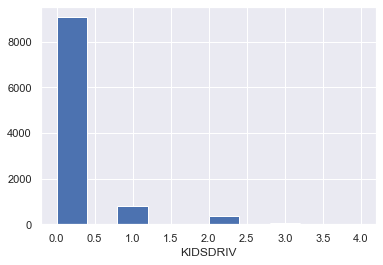

HOMEKIDS


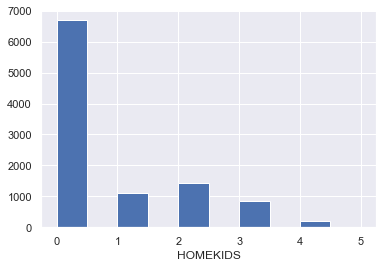

TRAVTIME


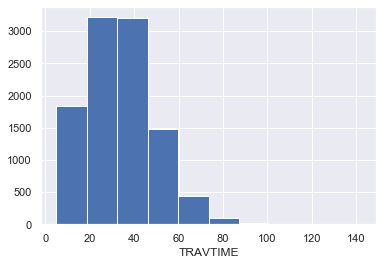

BLUEBOOK


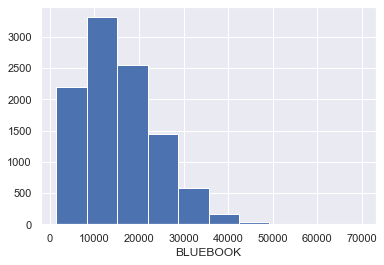

TIF


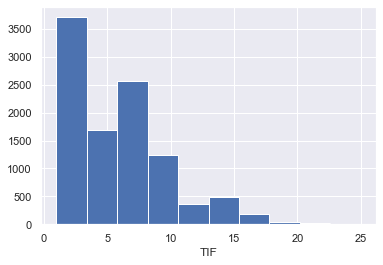

NPOLICY


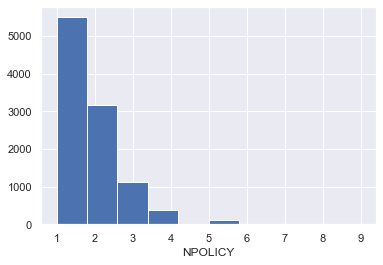

OLDCLAIM


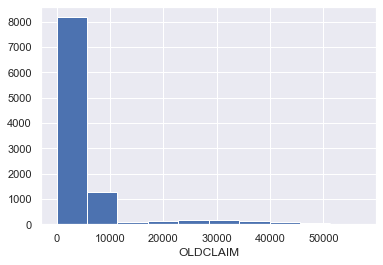

CLM_FREQ


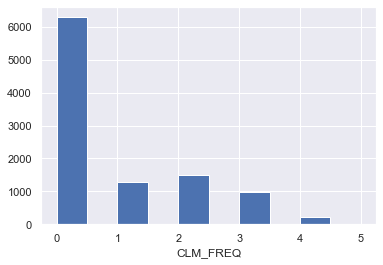

MVR_PTS


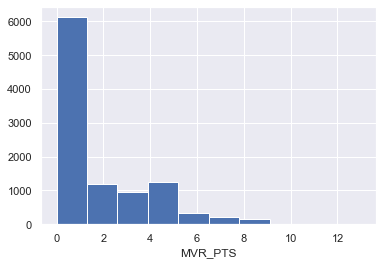

IMP_AGE


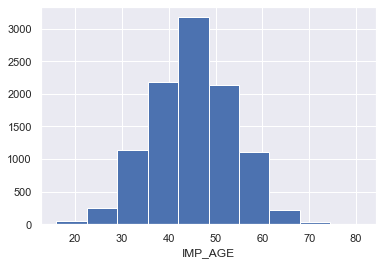

IMP_YOJ


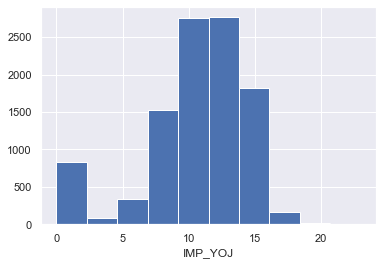

IMP_INCOME


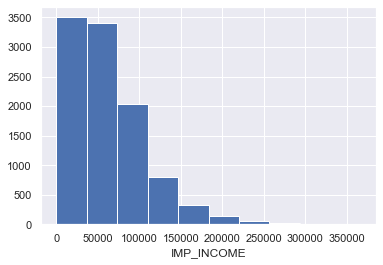

IMP_HOME_VAL


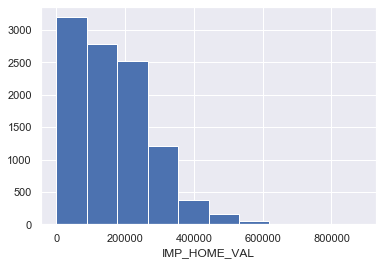

IMP_CAR_AGE


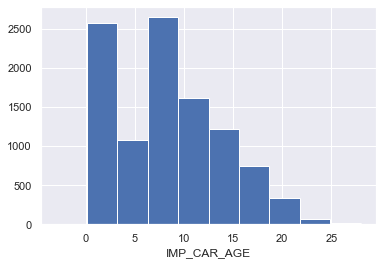

In [105]:
# Create a histogram to show distributions
print('NUMBER')
print('------------')
for i in numList:
    print(i)
    plt.hist(X[i])
    plt.xlabel(i)
    plt.show()

In [107]:
for i in numList:
    #print('------')
    theMean = X[i].mean()
    theSD = X[i].std()
    theMax = X[i].max()
    theCutOff = round(theMean + (3*theSD))
    if theMax < theCutOff : continue
    FLAG = "O_" + i
    TRUNC = "TRUNC_" + i
    X[FLAG] = (X[i] > theCutOff) + 0
    X[TRUNC] = X[i]
    X.loc[ X[TRUNC] > theCutOff, TRUNC] = theCutOff
    X = X.drop(i,axis=1)

In [109]:
# -----------------
# Give me a list of all variables in the data frame and just keep the floats and ints
dt = X.dtypes
numList = []
for i in dt.index:
#     print(i, dt[i])
    if i in ([TARGET_A, TARGET_F, 'M_AGE', 'M_YOJ', 'M_INCOME', 'M_HOME_VAL', 'M_CAR_AGE', 'y_EDU_4','y_EDU_3','y_EDU_2','y_EDU_1']) : continue
    if dt[i] in (['float64','int64']) : numList.append(i)

for i in numList:
    print(i)

O_KIDSDRIV
TRUNC_KIDSDRIV
O_HOMEKIDS
TRUNC_HOMEKIDS
O_TRAVTIME
TRUNC_TRAVTIME
O_BLUEBOOK
TRUNC_BLUEBOOK
O_TIF
TRUNC_TIF
O_NPOLICY
TRUNC_NPOLICY
O_OLDCLAIM
TRUNC_OLDCLAIM
O_CLM_FREQ
TRUNC_CLM_FREQ
O_MVR_PTS
TRUNC_MVR_PTS
O_IMP_AGE
TRUNC_IMP_AGE
O_IMP_YOJ
TRUNC_IMP_YOJ
O_IMP_INCOME
TRUNC_IMP_INCOME
O_IMP_HOME_VAL
TRUNC_IMP_HOME_VAL
O_IMP_CAR_AGE
TRUNC_IMP_CAR_AGE


In [110]:
print('NUMBER')
print('------------')
for i in numList:
    print(X[i].describe())
    print('-------\n')

NUMBER
------------
count    10302.000000
mean         0.007571
std          0.086688
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: O_KIDSDRIV, dtype: float64
-------

count    10302.000000
mean         0.161328
std          0.467555
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: TRUNC_KIDSDRIV, dtype: float64
-------

count    10302.000000
mean         0.001747
std          0.041765
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: O_HOMEKIDS, dtype: float64
-------

count    10302.000000
mean         0.718695
std          1.110390
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: TRUNC_HOMEKIDS, dtype: float64
-------

count    10302.000000
mean         0.004950
std          0.070189
min          0.000000
25%         

NUMBER
------------
O_KIDSDRIV


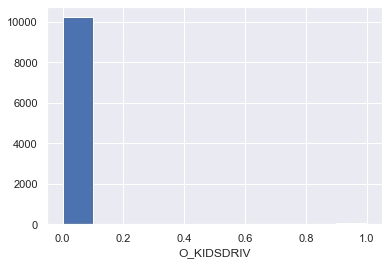

TRUNC_KIDSDRIV


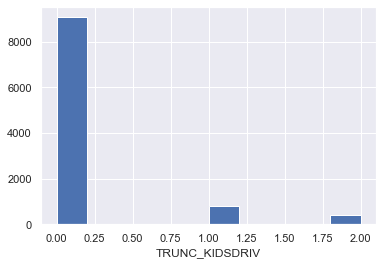

O_HOMEKIDS


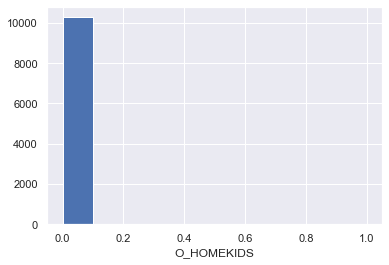

TRUNC_HOMEKIDS


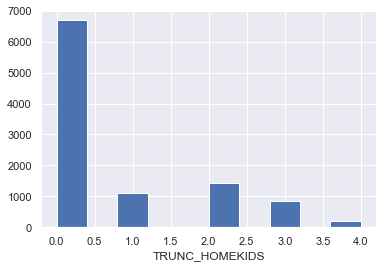

O_TRAVTIME


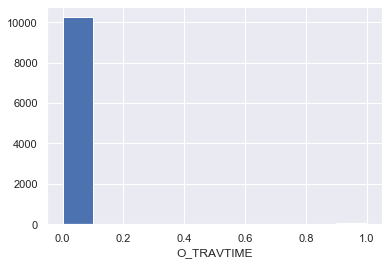

TRUNC_TRAVTIME


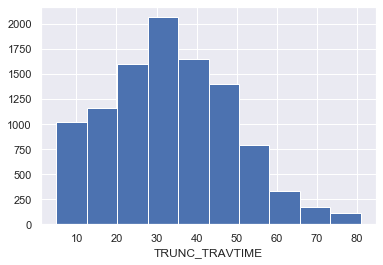

O_BLUEBOOK


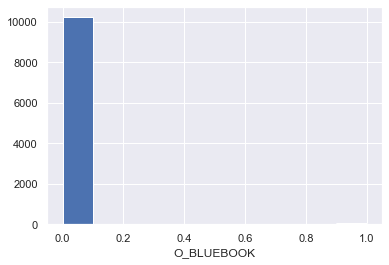

TRUNC_BLUEBOOK


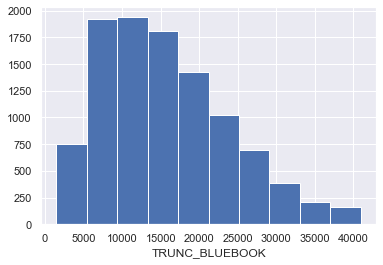

O_TIF


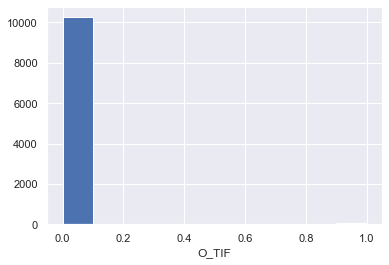

TRUNC_TIF


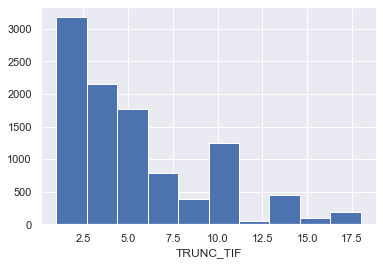

O_NPOLICY


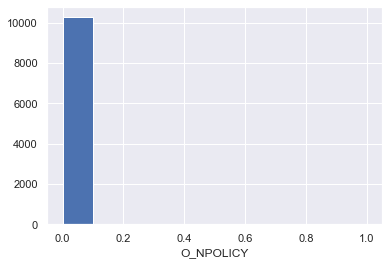

TRUNC_NPOLICY


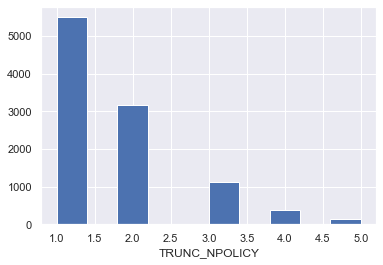

O_OLDCLAIM


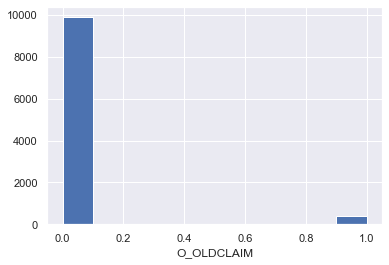

TRUNC_OLDCLAIM


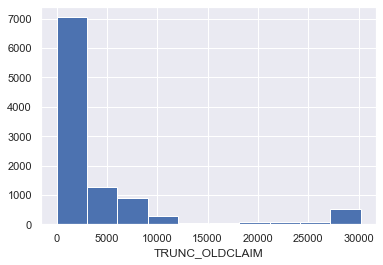

O_CLM_FREQ


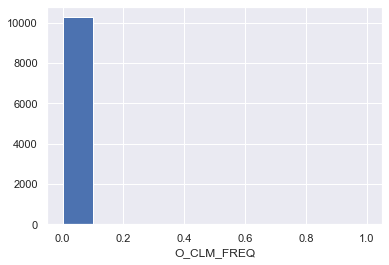

TRUNC_CLM_FREQ


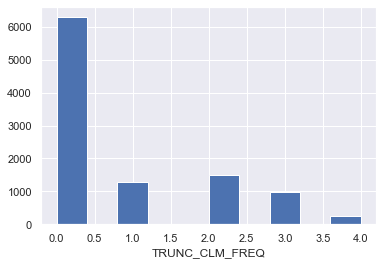

O_MVR_PTS


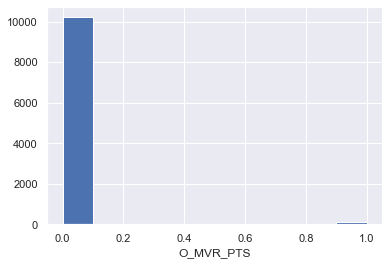

TRUNC_MVR_PTS


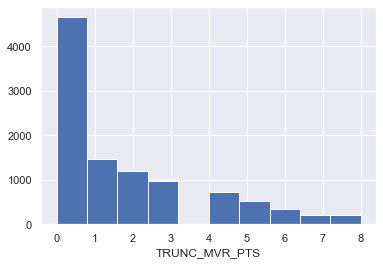

O_IMP_AGE


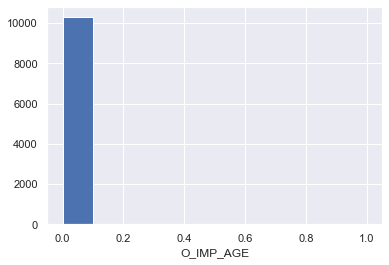

TRUNC_IMP_AGE


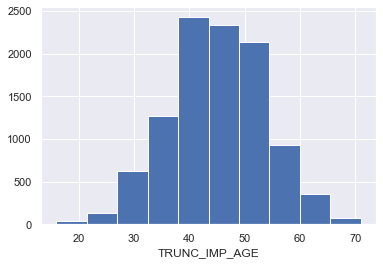

O_IMP_YOJ


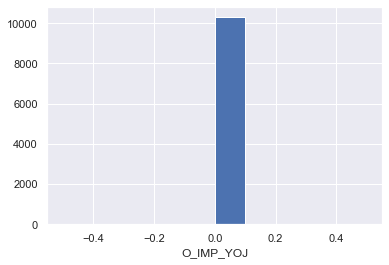

TRUNC_IMP_YOJ


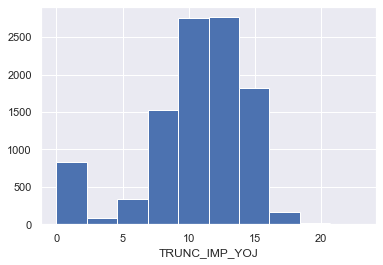

O_IMP_INCOME


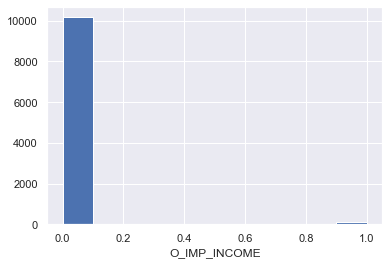

TRUNC_IMP_INCOME


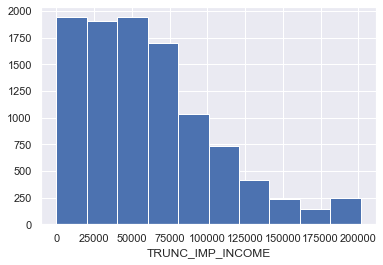

O_IMP_HOME_VAL


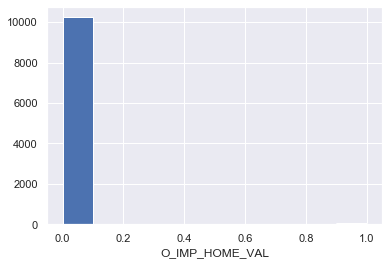

TRUNC_IMP_HOME_VAL


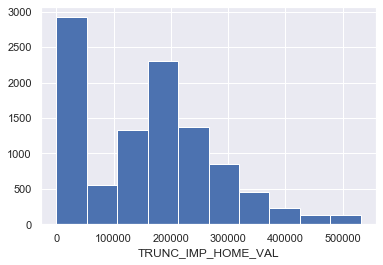

O_IMP_CAR_AGE


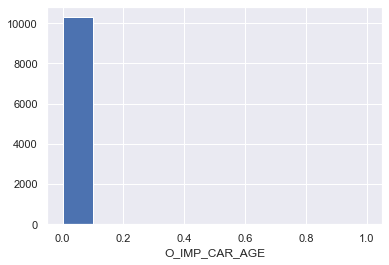

TRUNC_IMP_CAR_AGE


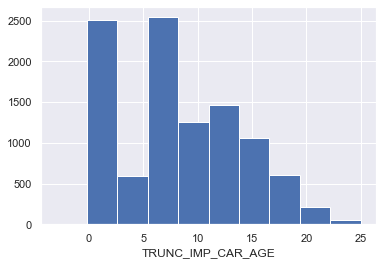

In [111]:
# Create a histogram to show distributions
print('NUMBER')
print('------------')
for i in numList:
    print(i)
    plt.hist(X[i])
    plt.xlabel(i)
    plt.show()